# Initial Exploration of `practice_data.tsv` Set
#### Author: Yasa Baig
In this notebook, we perform some basic exploration of the `practice_data.tsv`, looking at labels, features, and various other core properties of the dataset. 

Let us begin by importing core python data analysis libraries.

In [1]:
# Import numerical python and other packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the seaborn theme for the remainder of the exploration
sns.set_style("whitegrid")

#### Importing the Dataset

Let us begin by importing our dataset and cleaning it.

In [2]:
# Start by defining the file relative path of this dataset. 
file_name = "../../Data/practice_data.tsv"

# Read in the data, use unicode_escape in order to successfully encode the data. 
df = pd.read_csv(file_name, sep = "\t", encoding= 'unicode_escape')

# Print the first few entries of the dataset. 
df.head()

unique_id    core_id                                       citing_title  \
0       CC1  158977742  Ontology-Based Recommendation of Editorial Pro...   
1       CC2  158977742  Ontology-Based Recommendation of Editorial Pro...   
2       CC3  158977742  Ontology-Based Recommendation of Editorial Pro...   
3       CC4  158977742  Ontology-Based Recommendation of Editorial Pro...   
4       CC5  158977742  Ontology-Based Recommendation of Editorial Pro...   

              citing_author  \
0  Thiviyan Thanapalasingam   
1  Thiviyan Thanapalasingam   
2  Thiviyan Thanapalasingam   
3  Thiviyan Thanapalasingam   
4  Thiviyan Thanapalasingam   

                                         cited_title cited_author  \
0  Web search personalization with ontological us...         Sieg   
1             Exploring Scholarly Data with Rexplore      Osborne   
2  Klink-2: Integrating Multiple Web Sources to G...      Osborne   
3  Forecasting the Spreading of Technologies in R...      Osborne   
4  Supporting Springer Nature Editors by means of...      Osborne   

                                    citation_context  citation_class_label  \
0  They usually generate user models that describ...                     5   
1  The Computer Science Ontology (CSO)[3]is a lar...                     0   
2  In order to do so, we characterized all SN pub...                     0   
3  This API supports a number of applications, in...                     0   
4  It works according to three main steps:1) It r...                     5   

   citation_influence_label  
0                         0  
1                         0  
2                         0  
3                         1  
4                         1

## Examining Label Distribution

#### Single Class Labels

Our first step is to examine the label distribution of the dataset, looking for potential class imbalances and other critical features. Let us start with the binary label.

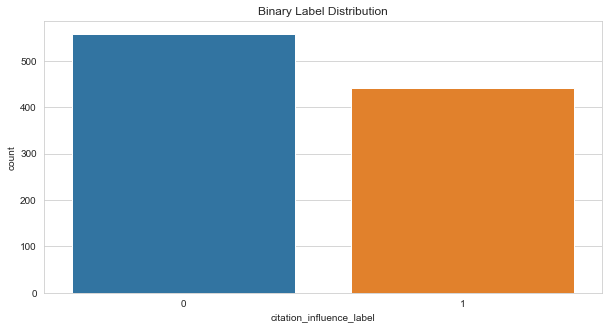

In [3]:
plt.figure(figsize = (10,5))
plt.title("Binary Label Distribution")
sns.countplot(x="citation_influence_label", data = df)
plt.show()

And similarly the multiclass label:

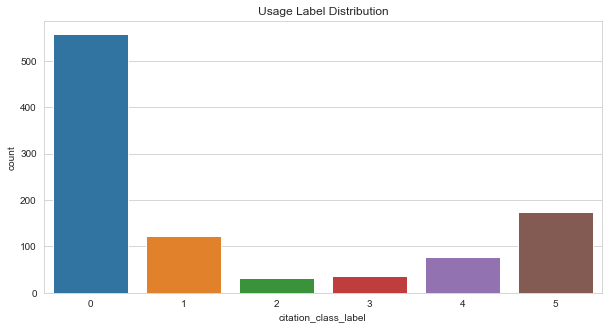

In [4]:
plt.figure(figsize = (10,5))
plt.title("Usage Label Distribution")
sns.countplot(x="citation_class_label", data = df)
plt.show()

*Observations*: The binary label distribution seems roughly balanced, with slightly more incidental over influential publiscations, which bodes well for classification. 

There is an overwhelming class imbalance in the usage label distribution, heavily favoring BACKGROUND over all other label classes. This is not terribly surprising given the amount of work scientists tend to do in order to establish precedence in their work, but still poses a major problem for later fittings. 

*Thoughts*: Some kind of weighting algorithm for each label could be important, alternatively we may want to leverage an algorithm like SMOTE in order to make up for the missing labels with synthetic data. Integrating in the other data source may also be useful.

## Class Correlation

Let's now see how the two label types intersect and see if we can find any interesting trends. First recall the label distribution names:

| Label | Meaning            |
|-------|--------------------|
| 0     | BACKGROUND         |
| 1     | COMPARES_CONTRASTS |
| 2     | EXTENSION          |
| 3     | FUTURE             |
| 4     | MOTIVATION         |
| 5     | USES               |


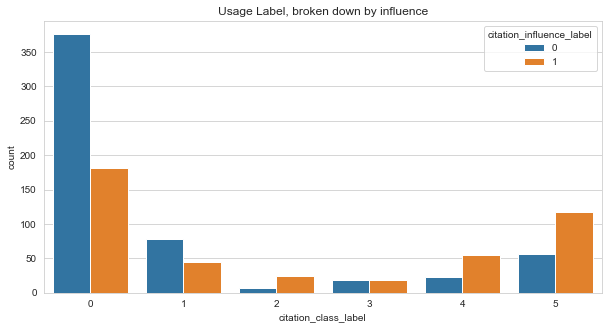

In [5]:
plt.figure(figsize = (10,5))
plt.title("Usage Label, broken down by influence")
sns.countplot(hue="citation_influence_label", x = "citation_class_label", data = df)
plt.show()

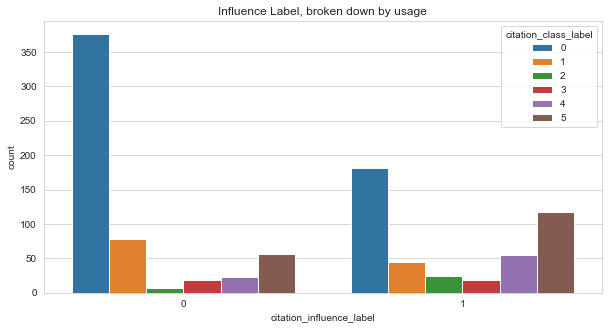

In [6]:
plt.figure(figsize = (10,5))
plt.title("Influence Label, broken down by usage")
sns.countplot(x="citation_influence_label", hue = "citation_class_label", data = df)
plt.show()

*Observation*: Here we see that there is major class imbalance in the dataset---there's a huge amount of background papers and a substantive lack of the other classes, especially EXTENSION and FUTURE. Also, as one would guess, a larger amount of background papers are only incidential and not majorly influential on the works. This suggests that one algorithm's output may be useful for training the other algorithm or the other label can be used as a feature for the other. 

*Thoughts*: Some kind of of synthetic data generation technique may be useful for correcting the class imbalance. SMOTE was leveraged in the origional paper, but we may be able to get away with more complex techniques or simpler techniques. 

## Article Title Clustering

There is likely some deeper structure to the semantic structure of the content. One method to visualize this is by generating word vector embeddings for the systems, but most usual word vector embedding means such as `BERT` are not trained on scientific texts but rather just normal human speech. Thus, we now attempt to use `SciBERT` as a potential solution to this, which is trained on scientific text. 

Here we experiment with using `SciBERT` embeddings followed by dimensionality reduction to cluster the titles in the dataset as well as construct a semantic similarity score between individual citing and cited titles. 

We begin by downloading all the necessary libraries. 

In [7]:
#!pip install transformers
#!wget -O scibert_uncased.tar https://s3-us-west-2.amazonaws.com/ai2-s2-research/scibert/huggingface_pytorch/scibert_scivocab_uncased.tar
#!tar -xvf scibert_uncased.tar
import torch
from transformers import BertTokenizer, BertModel

  Created wheel for sacremoses: filename=sacremoses-0.0.43-py3-none-any.whl size=893262 sha256=fab0f6a936acd83e3318b1df44b1af4b3a9124604c5a41850a13074e7578d976
  Stored in directory: c:\users\angik\appdata\local\pip\cache\wheels\69\09\d1\bf058f7d6fa0ecba2ce7c66be3b8d012beb4bf61a6e0c101c0
Successfully built sacremoses


'wget' is not recognized as an internal or external command,
operable program or batch file.
tar: Error opening archive: Failed to open 'scibert_uncased.tar'
